In [2]:
import pandas as pd


In [1]:
!pip install kagglehub


In [2]:
import kagglehub

# Download the Walmart dataset
path = kagglehub.dataset_download("yasserh/walmart-dataset")

print("✅ Dataset downloaded to:", path)


Using Colab cache for faster access to the 'walmart-dataset' dataset.
✅ Dataset downloaded to: /kaggle/input/walmart-dataset


In [3]:
import os

os.listdir(path)


['Walmart.csv']

In [4]:
import pandas as pd

df = pd.read_csv(f"{path}/Walmart.csv")
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(f"{path}/Walmart.csv")
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [8]:
print("Missing values (%):")
print(df.isna().mean() * 100)

print("\nDuplicate rows:", df.duplicated().sum())


Missing values (%):
Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

Duplicate rows: 0


In [9]:
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


Store: 45 unique values
Date: 143 unique values
Weekly_Sales: 6435 unique values
Holiday_Flag: 2 unique values
Temperature: 3528 unique values
Fuel_Price: 892 unique values
CPI: 2145 unique values
Unemployment: 349 unique values


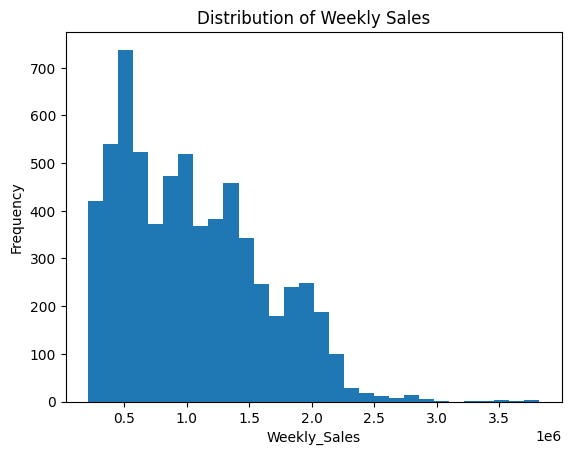

In [10]:
plt.hist(df['Weekly_Sales'], bins=30)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly_Sales")
plt.ylabel("Frequency")
plt.show()


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


ValueError: time data "19-02-2010" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [12]:
import seaborn as sns
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title("Sales on Holidays vs Non-Holidays")
plt.show()


ValueError: Could not interpret value `IsHoliday` for `x`. An entry with this name does not appear in `data`.

In [13]:
# Recheck for missing values
df.isna().sum()


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [14]:
# Fill numeric NaNs with median per Store
num_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for col in num_cols:
    df[col] = df.groupby('Store')[col].transform(lambda x: x.fillna(x.median()))

# Verify again
df.isna().sum()


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Walmart.csv')

# Verify the top rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Walmart.csv'

In [6]:
!ls

sample_data


In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anuradhasrivastav","key":"23b06036d5c97e31f23a08f980af20d2"}'}

In [9]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d yasserh/walmart-dataset


Dataset URL: https://www.kaggle.com/datasets/yasserh/walmart-dataset
License(s): CC0-1.0
  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 354MB/s]


In [11]:
!unzip walmart-dataset.zip


Archive:  walmart-dataset.zip
  inflating: Walmart.csv             


In [12]:
import pandas as pd
df = pd.read_csv('Walmart.csv')
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week


In [16]:
df['Date'].head(10)


,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
5,2010-03-12
6,2010-03-19
7,2010-03-26
8,2010-04-02
9,2010-04-09


In [20]:
df.columns.tolist()


['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Year',
 'Month',
 'Week']

In [21]:
# 1. Make sure Date is datetime and sorted properly
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

# 2. Create previous week's sales (lag feature)
df['Prev_Week_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(1)

# 3. Create rolling 4-week average of sales per store
df['Rolling_4wk_Avg'] = (
    df.groupby('Store')['Weekly_Sales']
      .rolling(window=4, min_periods=2)
      .mean()
      .reset_index(level=0, drop=True)
)

df.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Prev_Week_Sales,Rolling_4wk_Avg
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1643690.90,1.642824e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1641957.44,1.632539e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1611968.17,1.576836e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1409727.59,1.554615e+06
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,1554806.68,1.504011e+06
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,1439541.59,1.469148e+06
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,1472515.79,1.467823e+06
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,2010,4,13,1404429.92,1.477864e+06
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,2010,4,14,1594968.28,1.504333e+06


In [22]:
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
df['Year'] = df['Date'].dt.year.astype(int)


In [23]:
df.columns.tolist()


['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Year',
 'Month',
 'Week',
 'Prev_Week_Sales',
 'Rolling_4wk_Avg',
 'WeekOfYear']

In [24]:
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)


In [25]:
df['Date'].min(), df['Date'].max()


(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [26]:
cutoff_date = "2012-06-01"

train_df = df[df['Date'] < cutoff_date].copy()
val_df   = df[df['Date'] >= cutoff_date].copy()

print(train_df.shape, val_df.shape)


(5445, 14) (990, 14)


In [27]:
feature_candidates = [
    'Store',
    'WeekOfYear',
    'Year',
    'IsHoliday',
    'Prev_Week_Sales',
    'Rolling_4wk_Avg'
]

features = [col for col in feature_candidates if col in df.columns]

target = 'Weekly_Sales'
if 'Weekly_Sales_Log' in df.columns:
    target = 'Weekly_Sales_Log'

print("Using features:", features)
print("Target:", target)


Using features: ['Store', 'WeekOfYear', 'Year', 'Prev_Week_Sales', 'Rolling_4wk_Avg']
Target: Weekly_Sales


In [28]:
X_train = train_df[features]
y_train = train_df[target]

X_val = val_df[features]
y_val = val_df[target]

X_train.head(), y_train.head()


(   Store  WeekOfYear  Year  Prev_Week_Sales  Rolling_4wk_Avg
 0      1           5  2010              NaN              NaN
 1      1           6  2010       1643690.90     1.642824e+06
 2      1           7  2010       1641957.44     1.632539e+06
 3      1           8  2010       1611968.17     1.576836e+06
 4      1           9  2010       1409727.59     1.554615e+06,
 0    1643690.90
 1    1641957.44
 2    1611968.17
 3    1409727.59
 4    1554806.68
 Name: Weekly_Sales, dtype: float64)

In [29]:
df['Prev_Week_Sales'] = df['Prev_Week_Sales'].fillna(0)
df['Rolling_4wk_Avg'] = df['Rolling_4wk_Avg'].fillna(df['Rolling_4wk_Avg'].median())


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

val_preds = model.predict(X_val)


In [31]:
if target == 'Weekly_Sales_Log':
    # convert both true and predicted back to real dollar sales
    y_val_real = np.exp(y_val)
    val_preds_real = np.exp(val_preds)
else:
    y_val_real = y_val
    val_preds_real = val_preds


In [34]:
import math
rmse = math.sqrt(mean_squared_error(y_val_real, val_preds_real))

mae  = mean_absolute_error(y_val_real, val_preds_real)

mape = np.mean(np.abs((y_val_real - val_preds_real) / (y_val_real + 1e-9))) * 100

print("RMSE:", rmse)
print("MAE :", mae)
print("MAPE (%):", mape)



RMSE: 57710.18658749013
MAE : 39708.05570454543
MAPE (%): 3.85220848416797


In [36]:
!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download("yasserh/walmart-dataset")
print("✅ Dataset downloaded to:", path)


Using Colab cache for faster access to the 'walmart-dataset' dataset.
✅ Dataset downloaded to: /kaggle/input/walmart-dataset


In [37]:
df = pd.read_csv(f"{path}/Walmart.csv")


In [38]:
df.head()
df.shape


(6435, 8)

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)


ValueError: time data "19-02-2010" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [40]:
df.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [41]:
# === SETUP ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load dataset (using kagglehub or Google Drive path)
path = "/content/drive/MyDrive/data-mining-methodologies/CRISP_DM/data/raw"  # or wherever you saved it
df = pd.read_csv(f"{path}/Walmart.csv")

# Basic preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data-mining-methodologies/CRISP_DM/data/raw/Walmart.csv'

In [42]:
# === SETUP: install + download dataset fresh each run ===
!pip install -q kagglehub
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. Download Walmart dataset from Kaggle to a local cache folder
path = kagglehub.dataset_download("yasserh/walmart-dataset")
print("✅ Dataset downloaded to:", path)

# 2. Load the csv into a DataFrame
df = pd.read_csv(f"{path}/Walmart.csv")

# 3. Basic sanity check
print("Data shape:", df.shape)
print(df.head())


Using Colab cache for faster access to the 'walmart-dataset' dataset.
✅ Dataset downloaded to: /kaggle/input/walmart-dataset
Data shape: (6435, 8)
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [44]:
# Convert Date column to datetime and sort
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

# Lag feature: previous week's sales for each Store
df['Prev_Week_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(1)

# Rolling 4-week average of Weekly_Sales per Store
df['Rolling_4wk_Avg'] = (
    df.groupby('Store')['Weekly_Sales']
      .rolling(window=4, min_periods=2)
      .mean()
      .reset_index(level=0, drop=True)
)

# Time features
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
df['Year'] = df['Date'].dt.year.astype(int)

# Holiday flag as int
df['IsHoliday'] = df['Holiday_Flag'].astype(int)

# Fill missing lag/rolling values
df['Prev_Week_Sales'] = df['Prev_Week_Sales'].fillna(0)
df['Rolling_4wk_Avg'] = df['Rolling_4wk_Avg'].fillna(df['Rolling_4wk_Avg'].median())

df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Prev_Week_Sales,Rolling_4wk_Avg,WeekOfYear,Year,IsHoliday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0.00,9.690054e+05,5,2010,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1643690.90,1.642824e+06,6,2010,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1641957.44,1.632539e+06,7,2010,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1611968.17,1.576836e+06,8,2010,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1409727.59,1.554615e+06,9,2010,0


In [45]:
cutoff_date = "2012-06-01"

train_df = df[df['Date'] < cutoff_date].copy()
val_df   = df[df['Date'] >= cutoff_date].copy()

print("Train rows:", train_df.shape[0], " Val rows:", val_df.shape[0])


Train rows: 5445  Val rows: 990


In [46]:
features = [
    'Store',
    'IsHoliday',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'Prev_Week_Sales',
    'Rolling_4wk_Avg',
    'WeekOfYear',
    'Year'
]

target = 'Weekly_Sales'

X_train = train_df[features]
y_train = train_df[target]
X_val   = val_df[features]
y_val   = val_df[target]

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)


X_train shape: (5445, 10)
X_val shape: (990, 10)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)

# 2. Random Forest
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)

# 3. XGBoost
!pip install -q xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)


In [48]:
import numpy as np
import math

def evaluate_model(y_true, y_pred, label):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9))) * 100
    print(f"{label} ➜ RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")
    return rmse, mae, mape

print("\n📊 Model Comparison")
lr_scores  = evaluate_model(y_val, lr_pred,  "Linear Regression")
rf_scores  = evaluate_model(y_val, rf_pred,  "Random Forest")
xgb_scores = evaluate_model(y_val, xgb_pred, "XGBoost")



📊 Model Comparison
Linear Regression ➜ RMSE: 59695.67 | MAE: 44278.70 | MAPE: 4.63%
Random Forest ➜ RMSE: 58280.70 | MAE: 40758.35 | MAPE: 3.97%
XGBoost ➜ RMSE: 48580.48 | MAE: 34229.59 | MAPE: 3.50%


In [49]:
import pandas as pd

results = pd.DataFrame([
    ['Linear Regression',  *lr_scores],
    ['Random Forest',      *rf_scores],
    ['XGBoost',            *xgb_scores],
], columns=['Model', 'RMSE', 'MAE', 'MAPE'])

results


,Model,RMSE,MAE,MAPE
0,Linear Regression,59695.666659,44278.704279,4.626044
1,Random Forest,58280.702227,40758.345712,3.966811
2,XGBoost,48580.479750,34229.592758,3.502614


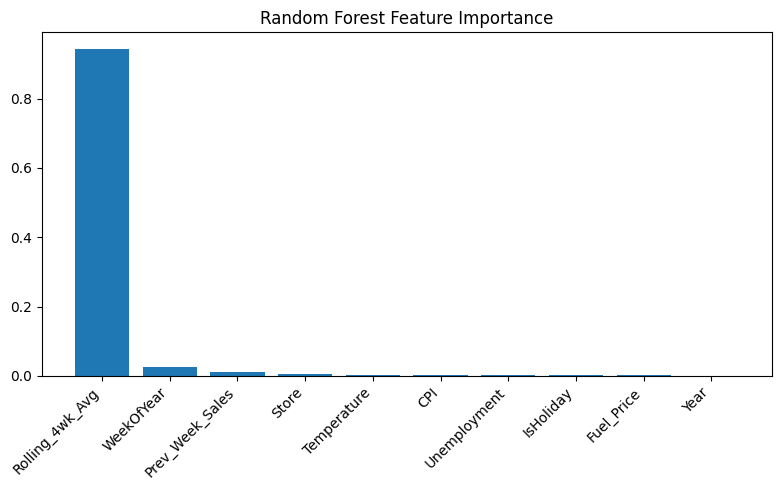

In [50]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(
    range(len(importances)),
    [features[i] for i in indices],
    rotation=45,
    ha='right'
)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


In [51]:
best_model = xgb    # or rf, whichever performed best
best_preds = xgb_pred


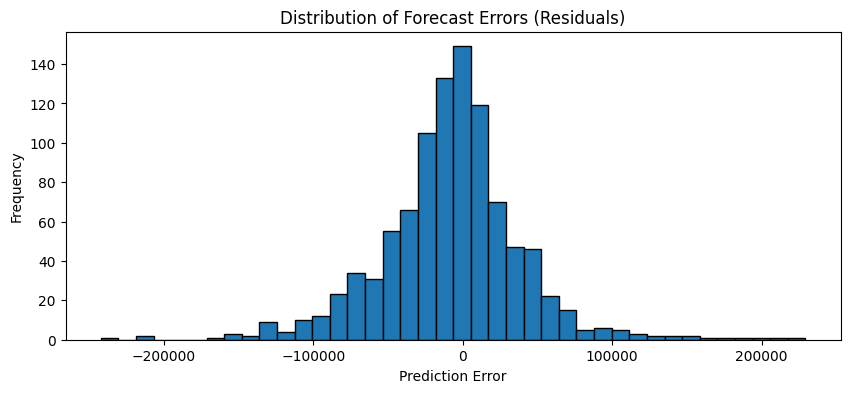

In [52]:
residuals = y_val - best_preds

plt.figure(figsize=(10,4))
plt.hist(residuals, bins=40, edgecolor='k')
plt.title("Distribution of Forecast Errors (Residuals)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()


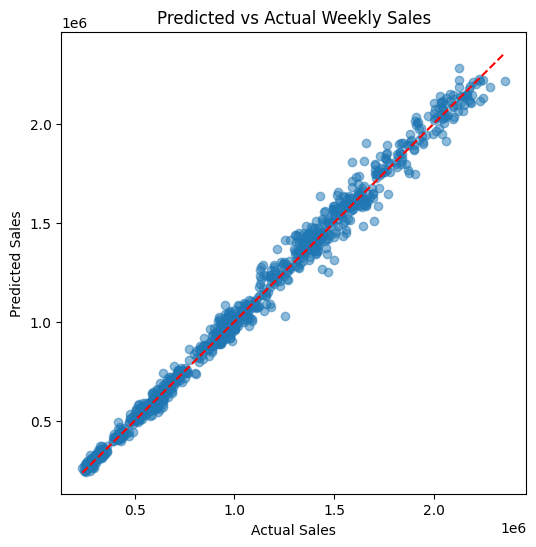

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, best_preds, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.title("Predicted vs Actual Weekly Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()


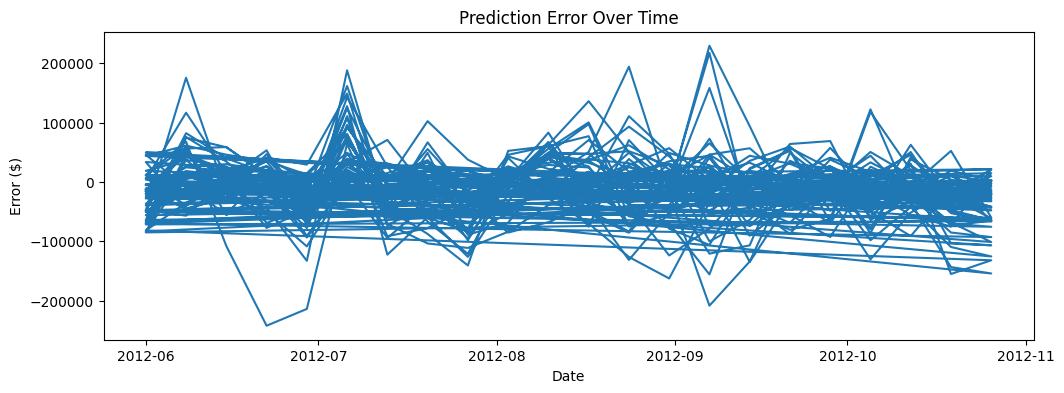

In [54]:
val_df = val_df.copy()
val_df["Predicted_Sales"] = best_preds
val_df["Error"] = val_df["Weekly_Sales"] - val_df["Predicted_Sales"]

plt.figure(figsize=(12,4))
plt.plot(val_df["Date"], val_df["Error"])
plt.title("Prediction Error Over Time")
plt.xlabel("Date")
plt.ylabel("Error ($)")
plt.show()


In [55]:
# ✅ Generate predictions for full dataset (simulate production)
df['Predicted_Sales'] = np.nan

# Use the best model (e.g., XGBoost or Random Forest)
best_model = xgb  # or rf if that was your winner

df['Predicted_Sales'] = best_model.predict(df[features])

# Save final predictions to CSV
output_path = "/content/walmart_sales_predictions.csv"
df[['Store', 'Date', 'Weekly_Sales', 'Predicted_Sales']].to_csv(output_path, index=False)

print(f"✅ Predictions exported successfully to: {output_path}")


✅ Predictions exported successfully to: /content/walmart_sales_predictions.csv


In [56]:
!pip install -q plotly
import plotly.express as px

fig = px.line(
    val_df,
    x='Date',
    y=['Weekly_Sales', 'Predicted_Sales'],
    title='Actual vs Predicted Weekly Sales (Validation Period)',
    labels={'value': 'Sales ($)', 'variable': 'Legend'}
)
fig.show()


In [58]:
# Automated retraining pipeline (conceptual)
def retrain_model(new_data_path):
    new_df = pd.read_csv(new_data_path)
    # preprocess features same as before
    # retrain best model
    model.fit(X_train_updated, y_train_updated)
    joblib.dump(model, "walmart_sales_model.pkl")
    print("✅ Model retrained and saved successfully.")
